<a href="https://colab.research.google.com/github/carvalheirafc/mnist-deeplearning/blob/main/mnist_data_handler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import Section

In [2]:
import numpy as np
import struct as st
import matplotlib.pyplot as plt
import warnings

In [ ]:
warnings.filterwarnings("ignore")

# Download and Converting Area

In [3]:
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz

--2020-10-13 18:25:12--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.28.6.204, 104.28.7.204, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  10.5MB/s    in 0.9s    

2020-10-13 18:25:13 (10.5 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2020-10-13 18:25:13--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.28.7.204, 104.28.6.204, 172.67.171.76, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.28.7.204|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘train-labels-idx1-ubyte.gz’

train-labels-idx1-u 100%[===================>]  28.20K  --.-K

In [4]:
!gzip -d /content/train-images-idx3-ubyte.gz
!gzip -d /content/train-labels-idx1-ubyte.gz

In [5]:
trainingfilenames = {'images' : '/content/train-images-idx3-ubyte' ,'labels' : '/content/train-labels-idx1-ubyte'}

In [6]:
for name in trainingfilenames.keys():
	if name == 'images':
		train_imagesfile = open(trainingfilenames[name],'rb')
	if name == 'labels':
		train_labelsfile = open(trainingfilenames[name],'rb')

In [7]:
train_imagesfile.seek(0)
magic = st.unpack('>4B',train_imagesfile.read(4))

train_imagesfile.seek(4)
nImg = st.unpack('>I',train_imagesfile.read(4))[0] #num of images/labels
nR = st.unpack('>I',train_imagesfile.read(4))[0] #num of rows
nC = st.unpack('>I',train_imagesfile.read(4))[0] #num of columns
train_labelsfile.seek(8)

labels = np.asarray(st.unpack('>'+'B'*nImg,train_labelsfile.read(nImg*1))).reshape((nImg,1))

nBytesTotal = nImg*nR*nC*1 #since each pixel data is 1 byte
samples = np.asarray(st.unpack('>'+'B'*nBytesTotal,train_imagesfile.read(nBytesTotal))).reshape((nImg,nR,nC))


In [8]:
print('Labels Array Format: ', labels.shape)
print('Samples Array Format: ', samples.shape)


Labels Array Format:  (60000, 1)
Samples Array Format:  (60000, 28, 28)


# Separating Classes

In [9]:
data_X = np.array(samples).reshape([60000, 1, 28, 28])

In [10]:
def class_arrays(index):
  return data_X[labels==index], labels[labels==index]

In [11]:
separeted_classes_dictionary = {0: [], 1: [], 
                                2: [], 3: [],
                                4: [], 5: [],
                                6: [], 7: [],
                                8: [], 9: []}

for it in range(10):
  separeted_classes_dictionary[it] = class_arrays(it)

### Mean of each Class

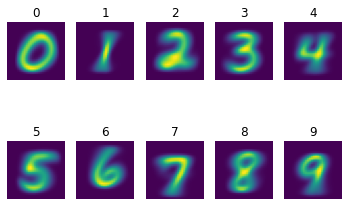

In [24]:
for it in range(10):
  plt.subplot(2, 5, it+1)
  plt.axis('off')
  plt.title(it)
  plt.imshow(separeted_classes_dictionary[it][0].mean(axis=0).squeeze())